In [209]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [210]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [211]:
NUM_CLASSES = 26

# Dataset reading

In [212]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [213]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [215]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='mish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='mish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='mish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [216]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_13 (Ba  (None, 42)                168       
 tchNormalization)                                               
                                                                 
 dense_45 (Dense)            (None, 128)               5504      
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 32)                2080      
                                                     

In [217]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [218]:
# Model compilation
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [219]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
179/214 [========================>.....] - ETA: 0s - loss: 4.0210 - accuracy: 0.1687
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.keras
214/214 [==============================] - 1s 2ms/step - loss: 3.8859 - accuracy: 0.1797 - val_loss: 3.1170 - val_accuracy: 0.2571
Epoch 2/1000
197/214 [==========================>...] - ETA: 0s - loss: 2.8523 - accuracy: 0.2711
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.keras
214/214 [==============================] - 0s 2ms/step - loss: 2.8395 - accuracy: 0.2728 - val_loss: 2.4974 - val_accuracy: 0.3347
Epoch 3/1000
181/214 [========================>.....] - ETA: 0s - loss: 2.5443 - accuracy: 0.3222
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.keras
214/214 [==============================] - 0s 2ms/step - loss: 2.5336 - accuracy: 0.3235 - val_loss: 2.2531 - val_accuracy: 0.4139
Epoch 4/1000
187/214 [=========================>....] - ETA: 0s - loss: 2.4026 - a

In [220]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

72/72 [==============================] - 0s 1ms/step - loss: 0.7374 - accuracy: 0.8570


In [221]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [222]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 72ms/step
[1.0130786e-03 1.7958477e-08 2.6170617e-09 1.1061940e-07 1.0997823e-06
 1.8513052e-06 7.6284891e-07 4.1495272e-11 1.8620205e-03 2.6052125e-04
 1.0214922e-06 3.7498587e-05 4.4277626e-06 1.9353675e-07 3.9355432e-06
 2.7757292e-08 8.4478486e-09 1.1688965e-09 1.5722765e-06 6.8896232e-05
 1.1767213e-09 2.7066334e-09 4.4506201e-08 1.3583608e-06 9.9674147e-01
 3.2538829e-08]
24


# Confusion matrix

285/285 [==============================] - 0s 1ms/step


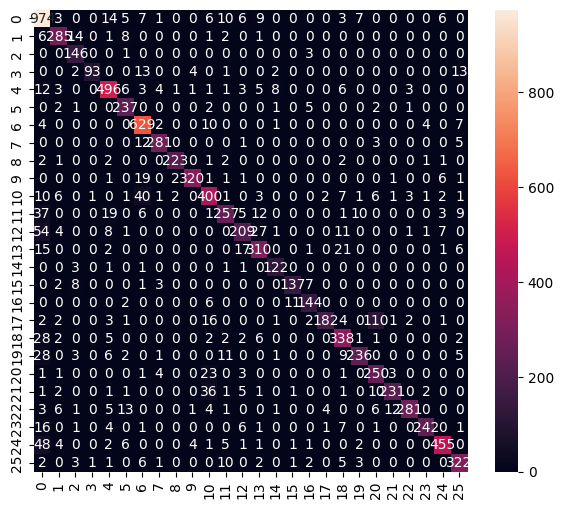

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1051
           1       0.88      0.90      0.89       318
           2       0.80      0.97      0.88       150
           3       0.98      0.73      0.83       128
           4       0.87      0.90      0.88       553
           5       0.83      0.94      0.89       251
           6       0.85      0.96      0.90       657
           7       0.94      0.93      0.94       302
           8       0.98      0.95      0.96       235
           9       0.97      0.91      0.94       353
          10       0.78      0.82      0.80       489
          11       0.84      0.71      0.77       360
          12       0.80      0.65      0.72       324
          13       0.82      0.83      0.83       373
          14       0.88      0.95      0.91       129
          15       0.91      0.87      0.89       158
          16       0.87      0.88      0.88       163
     

In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [224]:
# Save as a model dedicated to inference
model.save(model_save_path)

In [225]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\asusg\AppData\Local\Temp\tmpanx5227v\assets


INFO:tensorflow:Assets written to: C:\Users\asusg\AppData\Local\Temp\tmpanx5227v\assets


25272

# Inference test

In [226]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [227]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [228]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [229]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [230]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.1446909e-03 2.1106967e-08 3.0847871e-09 1.1019255e-07 1.2170891e-06
 2.2448312e-06 8.1397508e-07 4.8331585e-11 1.8968894e-03 2.3372135e-04
 1.2154513e-06 3.8949769e-05 4.9703453e-06 2.3234756e-07 4.5929833e-06
 2.9100324e-08 8.8771106e-09 1.5510279e-09 1.8381758e-06 7.3710864e-05
 1.4730114e-09 3.1731500e-09 5.0248154e-08 1.4640477e-06 9.9659318e-01
 3.2613823e-08]
24
